In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df0 = pd.read_csv('sonota.txt', skiprows=4, sep='\s+')

In [3]:
df0.head()

,DD/MM/AAAA,HH:MM,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL
0,21/01/2019,12:00,14.0,352.0,7.24,14.4,7.6,79.0,1013.3,0.0,-1.0
1,21/01/2019,13:00,346.0,331.0,10.81,21.6,7.0,82.0,1013.5,0.0,-1.0
2,21/01/2019,14:00,321.0,337.0,10.81,23.8,7.3,78.0,1014.2,0.0,21.7
3,21/01/2019,15:00,337.0,331.0,7.61,20.5,10.5,68.0,1014.7,0.0,177.2
4,21/01/2019,16:00,333.0,349.0,9.50,21.2,15.0,54.0,1015.1,0.0,307.7


In [4]:
df = pd.DataFrame(df0)

In [5]:
df.dtypes

DD/MM/AAAA     object
HH:MM          object
DIRS          float64
DIRR          float64
VELS          float64
VELR          float64
TEMP          float64
HR            float64
PB            float64
PREC          float64
RADSOL        float64
dtype: object

In [6]:
df['FECHA'] = pd.to_datetime(df.apply(lambda x: x['DD/MM/AAAA'] + ' ' + x['HH:MM'], 1), dayfirst=True)
df = df.drop(['DD/MM/AAAA', 'HH:MM'], 1)

In [7]:
df.head()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,FECHA
0,14.0,352.0,7.24,14.4,7.6,79.0,1013.3,0.0,-1.0,2019-01-21 12:00:00
1,346.0,331.0,10.81,21.6,7.0,82.0,1013.5,0.0,-1.0,2019-01-21 13:00:00
2,321.0,337.0,10.81,23.8,7.3,78.0,1014.2,0.0,21.7,2019-01-21 14:00:00
3,337.0,331.0,7.61,20.5,10.5,68.0,1014.7,0.0,177.2,2019-01-21 15:00:00
4,333.0,349.0,9.50,21.2,15.0,54.0,1015.1,0.0,307.7,2019-01-21 16:00:00


In [8]:
df.describe()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL
count,125.00000,125.00000,125.000000,124.000000,124.000000,123.000000,123.000000,123.0,123.000000
mean,248.20000,260.67680,17.444880,28.163710,16.071774,48.845528,1016.539837,0.0,177.134146
std,75.27573,98.36992,23.819549,11.434418,3.790200,16.473542,2.755047,0.0,257.860939
min,14.00000,11.00000,0.420000,7.200000,7.000000,17.000000,1010.800000,0.0,-1.000000
25%,252.00000,252.00000,9.150000,20.800000,13.900000,37.500000,1014.850000,0.0,-1.000000
50%,270.00000,273.00000,15.210000,27.000000,16.100000,48.000000,1016.100000,0.0,-1.000000
75%,283.00000,285.00000,20.470000,36.000000,18.675000,59.000000,1017.850000,0.0,312.500000
max,346.00000,1017.60000,266.700000,55.400000,22.600000,91.000000,1022.800000,0.0,771.300000


In [9]:
df_tmp = df[df.TEMP>10]
df_select = df_tmp[df_tmp.TEMP<20]
df_select

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,FECHA
3,337.0,331.0,7.61,20.5,10.5,68.0,1014.7,0.0,177.2,2019-01-21 15:00:00
4,333.0,349.0,9.50,21.2,15.0,54.0,1015.1,0.0,307.7,2019-01-21 16:00:00
5,76.0,32.0,5.86,16.6,18.5,48.0,1015.1,0.0,441.7,2019-01-21 17:00:00
6,96.0,105.0,9.21,14.0,18.6,54.0,1014.9,0.0,431.5,2019-01-21 18:00:00
12,158.0,155.0,7.79,23.0,19.0,70.0,1011.0,0.0,39.5,2019-01-22 00:00:00
13,212.0,237.0,6.03,10.8,17.7,86.0,1010.8,0.0,-0.8,2019-01-22 01:00:00
14,224.0,263.0,4.00,8.6,16.5,91.0,1011.1,0.0,-1.0,2019-01-22 02:00:00
15,223.0,246.0,8.22,18.7,17.1,86.0,1011.6,0.0,-1.0,2019-01-22 03:00:00
16,270.0,236.0,12.87,25.2,17.3,63.0,1011.7,0.0,-1.0,2019-01-22 04:00:00
17,266.0,268.0,14.09,23.8,17.4,59.0,1011.9,0.0,-1.0,2019-01-22 05:00:00


In [10]:
df.mean()

DIRS       248.200000
DIRR       260.676800
VELS        17.444880
VELR        28.163710
TEMP        16.071774
HR          48.845528
PB        1016.539837
PREC         0.000000
RADSOL     177.134146
dtype: float64

In [11]:
df.TEMP.mean()

16.071774193548386

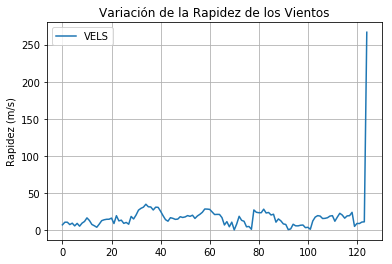

In [12]:
plt.figure(); df.VELS.plot(); plt.legend(loc='best')
plt.title("Variación de la Rapidez de los Vientos")
plt.ylabel("Rapidez (m/s)")
plt.grid(True)
plt.show()

<Figure size 432x288 with 0 Axes>

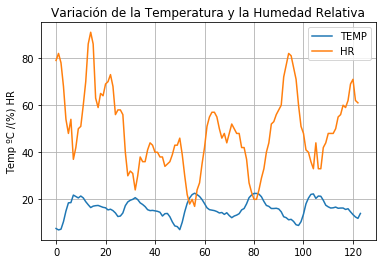

In [13]:
df1 = df[['TEMP','HR']]
plt.figure(); df1.plot(); plt.legend(loc='best')
plt.title("Variación de la Temperatura y la Humedad Relativa")
plt.ylabel("Temp ºC /(%) HR")
plt.grid(True)
plt.show()

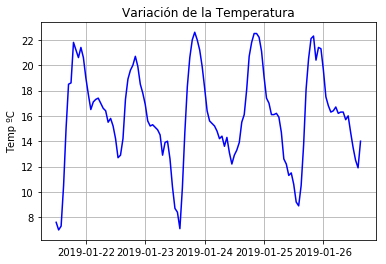

In [14]:
plt.plot_date(x=df.FECHA, y=df.TEMP, fmt="b-")
plt.title("Variación de la Temperatura")
plt.ylabel("Temp ºC")
plt.grid(True)
plt.show()

In [15]:
df_tmp = df[df.FECHA>'2019-01-21 23:00']
df_select = df_tmp[df_tmp.FECHA<'2019-01-23 00:00']
df_select

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL,FECHA
12,158.0,155.0,7.79,23.0,19.0,70.0,1011.0,0.0,39.5,2019-01-22 00:00:00
13,212.0,237.0,6.03,10.8,17.7,86.0,1010.8,0.0,-0.8,2019-01-22 01:00:00
14,224.0,263.0,4.00,8.6,16.5,91.0,1011.1,0.0,-1.0,2019-01-22 02:00:00
15,223.0,246.0,8.22,18.7,17.1,86.0,1011.6,0.0,-1.0,2019-01-22 03:00:00
16,270.0,236.0,12.87,25.2,17.3,63.0,1011.7,0.0,-1.0,2019-01-22 04:00:00
17,266.0,268.0,14.09,23.8,17.4,59.0,1011.9,0.0,-1.0,2019-01-22 05:00:00
18,257.0,248.0,14.73,24.1,17.0,65.0,1012.6,0.0,-1.0,2019-01-22 06:00:00
19,267.0,275.0,14.81,26.3,16.6,64.0,1013.0,0.0,-1.0,2019-01-22 07:00:00
20,282.0,288.0,16.34,31.0,16.4,69.0,1013.5,0.0,-1.0,2019-01-22 08:00:00
21,275.0,282.0,9.03,21.2,15.5,70.0,1014.0,0.0,-1.0,2019-01-22 09:00:00


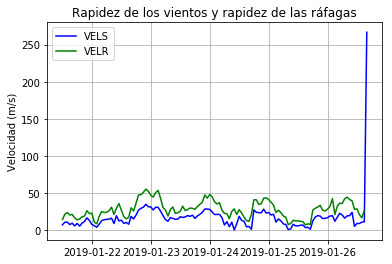

In [16]:
plt.plot_date(x=df.FECHA, y=df.VELS,fmt="b-", xdate=True);plt.legend(loc='best')
plt.plot_date(x=df.FECHA, y=df.VELR,fmt="g-", xdate=True);plt.legend(loc='best')
plt.title("Rapidez de los vientos y rapidez de las ráfagas")
plt.ylabel("Velocidad (m/s)")
plt.grid(True)
plt.savefig('Figura_1.png')
plt.show()


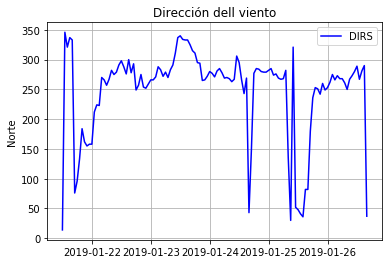

In [17]:
plt.plot_date(x=df.FECHA, y=df.DIRS,fmt="b-", xdate=True);plt.legend(loc='best')
plt.title("Dirección dell viento")
plt.ylabel("Norte")
plt.grid(True)
plt.savefig('Figura_2.png')
plt.show()

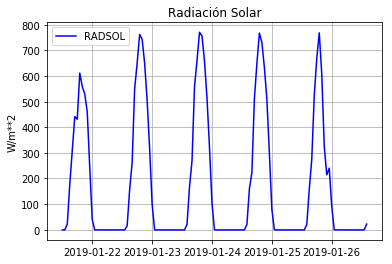

In [18]:
plt.plot_date(x=df.FECHA, y=df.RADSOL,fmt="b-", xdate=True);plt.legend(loc='best')
plt.title("Radiación Solar")
plt.ylabel("W/m**2")
plt.grid(True)
plt.savefig('Figura_3.png')
plt.show()

In [20]:
df.describe()

,DIRS,DIRR,VELS,VELR,TEMP,HR,PB,PREC,RADSOL
count,125.00000,125.00000,125.000000,124.000000,124.000000,123.000000,123.000000,123.0,123.000000
mean,248.20000,260.67680,17.444880,28.163710,16.071774,48.845528,1016.539837,0.0,177.134146
std,75.27573,98.36992,23.819549,11.434418,3.790200,16.473542,2.755047,0.0,257.860939
min,14.00000,11.00000,0.420000,7.200000,7.000000,17.000000,1010.800000,0.0,-1.000000
25%,252.00000,252.00000,9.150000,20.800000,13.900000,37.500000,1014.850000,0.0,-1.000000
50%,270.00000,273.00000,15.210000,27.000000,16.100000,48.000000,1016.100000,0.0,-1.000000
75%,283.00000,285.00000,20.470000,36.000000,18.675000,59.000000,1017.850000,0.0,312.500000
max,346.00000,1017.60000,266.700000,55.400000,22.600000,91.000000,1022.800000,0.0,771.300000
